In [1]:
# a) Tempo de duração da Rotina 04    -  TempoMinutos --> TESTES EFETUADOS PARA ESTE CENÁRIO
# b) Início de execução da Rotina 01  -  TempoMinutosInicioExecucao
# c) Tempo de duração da Rotina 01    -  TempoMinutos


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [3]:
# Define Pesquisa
processo = 'Rotina_04'
coluna = 'TempoMinutos'

In [4]:
# Efetua carga da base
_df = pd.read_excel('DataFrame_Processos_Percentual_Base_CompletaAjusteOutLiers.xlsx')
_df = _df.loc[_df['Processo']==processo]
_df.head()

,DiaInicio,DtHoraInicio,DtHoraFim,Processo,TempoMinutos,TempoMinutosInicioExecucao
1077,2021-01-05,2021-01-05 02:44:00,2021-01-05 06:30:00,Rotina_04,226,164.0
1078,2021-01-06,2021-01-06 02:16:00,2021-01-06 06:52:00,Rotina_04,276,136.0
1079,2021-01-07,2021-01-07 04:27:00,2021-01-07 11:11:00,Rotina_04,404,267.0
1080,2021-01-08,2021-01-08 04:06:00,2021-01-08 10:44:00,Rotina_04,398,246.0
1081,2021-01-09,2021-01-09 02:06:00,2021-01-09 06:15:00,Rotina_04,249,126.0


In [5]:
# Cria Dataframe somente com as colunas que interessam
df = pd.DataFrame(_df, columns = ['DiaInicio', coluna])
df.DiaInicio = pd.to_datetime(df.DiaInicio)
df.set_index('DiaInicio', inplace=True)

In [6]:
df.head()

,TempoMinutos
DiaInicio,
2021-01-05,226
2021-01-06,276
2021-01-07,404
2021-01-08,398
2021-01-09,249


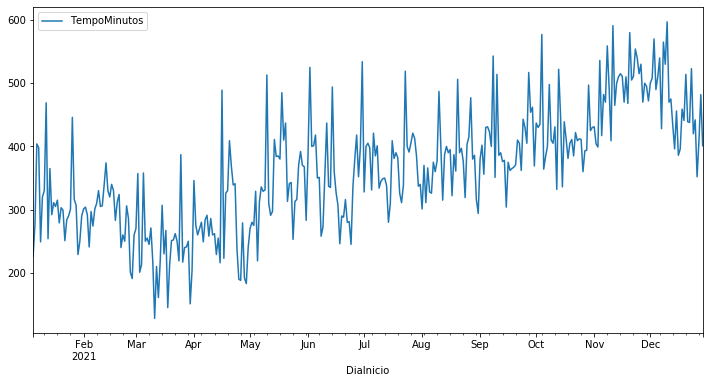

In [7]:
df.plot(figsize=(12,6))

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

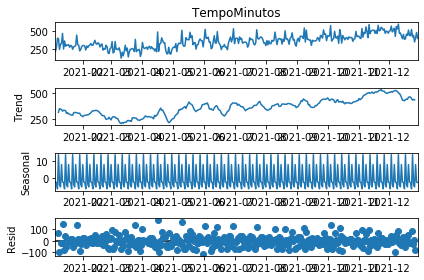

In [9]:
results = seasonal_decompose(df[coluna])
results.plot();

In [10]:
tamDF = len(df)
tamDF

359

In [11]:
# 359-12 = 347
n_previsoes=60
tamTreino = tamDF - n_previsoes
train = df.iloc[:tamTreino]
test = df.iloc[tamTreino:]

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
df.head(),df.tail()

(            TempoMinutos
 DiaInicio               
 2021-01-05           226
 2021-01-06           276
 2021-01-07           404
 2021-01-08           398
 2021-01-09           249,
             TempoMinutos
 DiaInicio               
 2021-12-25           442
 2021-12-26           352
 2021-12-27           408
 2021-12-28           482
 2021-12-29           401)

In [14]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [15]:
scaled_train[:5]

array([[0.21826281],
       [0.32962138],
       [0.61469933],
       [0.6013363 ],
       [0.26948775]])

In [16]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
# n_input - qtdade de períodos a serem agrupados(previstos)
n_features = 1
n_input = 14
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [20]:
# REDE NEURAL CONVOLUCIONAL

model = Sequential()
model.add(InputLayer((n_input, 1))) # n_input --> TAMANHO DA JANELA 
model.add(Conv1D(50, kernel_size=2))
model.add(Flatten())
model.add(Dense(40, 'relu'))
model.add(Dense(40, 'relu'))
model.add(Dense(1, 'linear'))
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.00001), metrics=[RootMeanSquaredError()])



In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 50)            150       
                                                                 
 flatten (Flatten)           (None, 650)               0         
                                                                 
 dense (Dense)               (None, 40)                26040     
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 27,871
Trainable params: 27,871
Non-trainable params: 0
_________________________________________________________________


In [22]:
# fit model - a partir de 3 épocas ja não tem mais ganho
model.fit(generator,epochs=10)

Epoch 1/10
285/285 [==============================] - 1s 1ms/step - loss: 0.0890 - root_mean_squared_error: 0.2983
Epoch 2/10
285/285 [==============================] - 0s 1ms/step - loss: 0.0232 - root_mean_squared_error: 0.1522
Epoch 3/10
285/285 [==============================] - 0s 1ms/step - loss: 0.0202 - root_mean_squared_error: 0.1422
Epoch 4/10
285/285 [==============================] - 0s 1ms/step - loss: 0.0199 - root_mean_squared_error: 0.1412
Epoch 5/10
285/285 [==============================] - 0s 1ms/step - loss: 0.0198 - root_mean_squared_error: 0.1405
Epoch 6/10
285/285 [==============================] - 0s 1ms/step - loss: 0.0195 - root_mean_squared_error: 0.1396
Epoch 7/10
285/285 [==============================] - 0s 1ms/step - loss: 0.0194 - root_mean_squared_error: 0.1391
Epoch 8/10
285/285 [==============================] - 0s 1ms/step - loss: 0.0190 - root_mean_squared_error: 0.1379
Epoch 9/10
285/285 [==============================] - 0s 1ms/step - loss: 0.0186

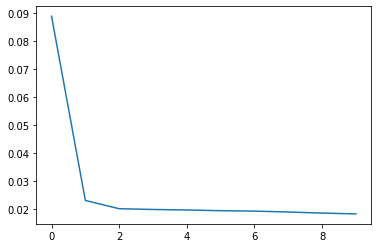

In [23]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [24]:
last_train_batch = scaled_train[-n_input:]

In [25]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [26]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 82ms/step


array([[0.61738116]], dtype=float32)

In [27]:
scaled_test[0]

array([0.67260579])

In [28]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 14ms/step


In [29]:
test_predictions

[array([0.61738116], dtype=float32),
 array([0.6235019], dtype=float32),
 array([0.6047254], dtype=float32),
 array([0.6252893], dtype=float32),
 array([0.60859686], dtype=float32),
 array([0.6190815], dtype=float32),
 array([0.61764115], dtype=float32),
 array([0.60844445], dtype=float32),
 array([0.6158288], dtype=float32),
 array([0.59322363], dtype=float32),
 array([0.63399917], dtype=float32),
 array([0.61960447], dtype=float32),
 array([0.6147942], dtype=float32),
 array([0.6089806], dtype=float32),
 array([0.60309905], dtype=float32),
 array([0.6060894], dtype=float32),
 array([0.60157883], dtype=float32),
 array([0.60345715], dtype=float32),
 array([0.60067093], dtype=float32),
 array([0.5997635], dtype=float32),
 array([0.6011496], dtype=float32),
 array([0.59445345], dtype=float32),
 array([0.5989011], dtype=float32),
 array([0.5963047], dtype=float32),
 array([0.595887], dtype=float32),
 array([0.5937233], dtype=float32),
 array([0.59155124], dtype=float32),
 array([0.590938

In [30]:
test.head()

,TempoMinutos
DiaInicio,
2021-10-31,430
2021-11-01,431
2021-11-02,404
2021-11-03,399
2021-11-04,536


In [31]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[405.20413882],
       [407.95235169],
       [399.52171379],
       [408.7549051 ],
       [401.25999075],
       [405.96759224],
       [405.32087678],
       [401.19155908],
       [404.50713664],
       [394.35741049],
       [412.66562682],
       [406.20240629],
       [404.04259342],
       [401.43228763],
       [398.79147261],
       [400.13414651],
       [398.10889542],
       [398.95226163],
       [397.70124924],
       [397.29381716],
       [397.91617876],
       [394.90960085],
       [396.90659076],
       [395.74081689],
       [395.55326539],
       [394.58176041],
       [393.60650867],
       [393.33128327],
       [392.48323363],
       [392.373106  ],
       [391.63563895],
       [391.18158662],
       [390.98664868],
       [390.08560932],
       [389.9353112 ],
       [389.31977403],
       [388.98591202],
       [388.45879811],
       [387.93759871],
       [387.51319921],
       [386.97786921],
       [386.62770885],
       [386.14097953],
       [385

In [32]:
test['Predictions'] = true_predictions

C:\Users\Michael\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
test.head(20)

,TempoMinutos,Predictions
DiaInicio,,
2021-10-31,430,405.204139
2021-11-01,431,407.952352
2021-11-02,404,399.521714
2021-11-03,399,408.754905
2021-11-04,536,401.259991
2021-11-05,417,405.967592
2021-11-06,482,405.320877
2021-11-07,470,401.191559
2021-11-08,559,404.507137


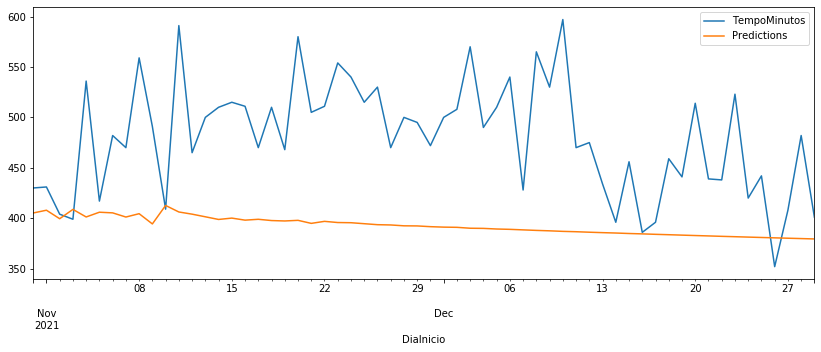

In [34]:
test.plot(figsize=(14,5))

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test[coluna],test['Predictions']))
print(rmse)

103.19814453573


In [36]:
test['Diferenca'] = abs(test[coluna]- test['Predictions']) # módulo da diferença
test.head(n_input)

C:\Users\Michael\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TempoMinutos,Predictions,Diferenca
DiaInicio,,,
2021-10-31,430,405.204139,24.795861
2021-11-01,431,407.952352,23.047648
2021-11-02,404,399.521714,4.478286
2021-11-03,399,408.754905,9.754905
2021-11-04,536,401.259991,134.740009
2021-11-05,417,405.967592,11.032408
2021-11-06,482,405.320877,76.679123
2021-11-07,470,401.191559,68.808441
2021-11-08,559,404.507137,154.492863


In [37]:
'''
Resumo: CONVOLUCIONAL

a) Tempo de duração da Rotina 04 - Dados NORMALIZADOS

processo = 'Rotina_04'
coluna = 'TempoMinutos'

3/4    (75% / 25%)	ARIMA(2,1,0)(0,1,1)[12] 	RMSE: 62,27

-----------------------------------------------------------------------------

n_previsoes=15
n_input = 7
model.add(Conv1D(80, kernel_size=2))
model.add(Dense(60, 'relu'))
model.add(Dense(60, 'relu'))
RMSE:  49.73331390756226

n_previsoes=30
n_input = 7
model.add(Conv1D(80, kernel_size=2))
model.add(Dense(60, 'relu'))
model.add(Dense(60, 'relu'))
RMSE:  58.653446663609365

n_previsoes=60
n_input = 7
model.add(Conv1D(80, kernel_size=2))
model.add(Dense(60, 'relu'))
model.add(Dense(60, 'relu'))
RMSE:  108.510384898156

n_previsoes=120
n_input = 7
model.add(Conv1D(80, kernel_size=2))
model.add(Dense(60, 'relu'))
model.add(Dense(60, 'relu'))
RMSE:  132.64781242937386

-----------------------------------------------------------------------------

n_previsoes=15
n_input = 14
model.add(Conv1D(80, kernel_size=2))
model.add(Dense(60, 'relu'))
model.add(Dense(60, 'relu'))
RMSE: 70.39024498893036

n_previsoes=30
n_input = 14
model.add(Conv1D(80, kernel_size=2))
model.add(Dense(60, 'relu'))
model.add(Dense(60, 'relu'))
RMSE: 77.07610381858937

n_previsoes=60
n_input = 14
model.add(Conv1D(80, kernel_size=2))
model.add(Dense(60, 'relu'))
model.add(Dense(60, 'relu'))
RMSE: 76.99194697273718

n_previsoes=120
n_input = 14
model.add(Conv1D(80, kernel_size=2))
model.add(Dense(60, 'relu'))
model.add(Dense(60, 'relu'))
RMSE: 104.33134627008671

-----------------------------------------------------------------------------

n_previsoes=15
n_input = 14
model.add(Conv1D(60, kernel_size=2))
model.add(Dense(50, 'relu'))
model.add(Dense(50, 'relu'))
RMSE: 62.65368109557033

n_previsoes=30
n_input = 14
model.add(Conv1D(60, kernel_size=2))
model.add(Dense(50, 'relu'))
model.add(Dense(50, 'relu'))
RMSE:  54.27488440415736

n_previsoes=60
n_input = 14
model.add(Conv1D(60, kernel_size=2))
model.add(Dense(50, 'relu'))
model.add(Dense(50, 'relu'))
RMSE:  75.36946751819802

n_previsoes=120
n_input = 14
model.add(Conv1D(60, kernel_size=2))
model.add(Dense(50, 'relu'))
model.add(Dense(50, 'relu'))
RMSE:  81.91943018225693

-----------------------------------------------------------------------------


n_previsoes=15
n_input = 14
model.add(Conv1D(50, kernel_size=2))
model.add(Dense(40, 'relu'))
model.add(Dense(40, 'relu'))
RMSE:  71.07719436756196

n_previsoes=30
n_input = 14
model.add(Conv1D(50, kernel_size=2))
model.add(Dense(40, 'relu'))
model.add(Dense(40, 'relu'))
RMSE:  57.74449617717278

n_previsoes=60
n_input = 14
model.add(Conv1D(50, kernel_size=2))
model.add(Dense(40, 'relu'))
model.add(Dense(40, 'relu'))
RMSE:   103.19814453573

n_previsoes=120
n_input = 14
model.add(Conv1D(50, kernel_size=2))
model.add(Dense(40, 'relu'))
model.add(Dense(40, 'relu'))
RMSE:  128.8712535728531

-----------------------------------------------------------------------------



'''

'\nResumo:\na) Tempo de duração da Rotina 04 \n\n\n\n'